# Clasificación

Dataset: [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) (función [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris))

In [135]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [136]:
X, y = iris.data, iris.target

Text(0, 0.5, 'Target')

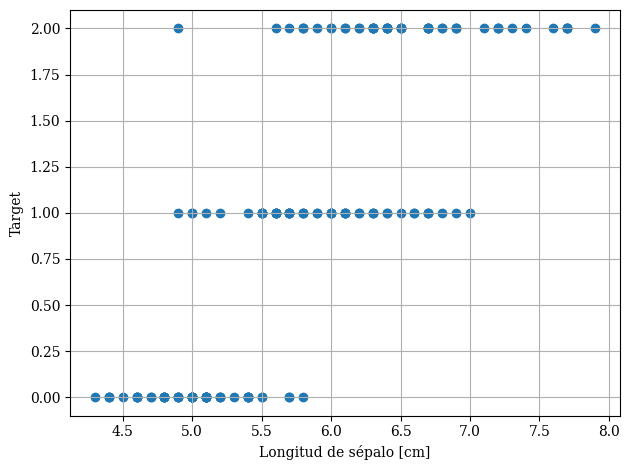

In [137]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], y)
plt.xlabel('Longitud de sépalo [cm]')
plt.ylabel('Target')


Text(0, 0.5, 'Target')

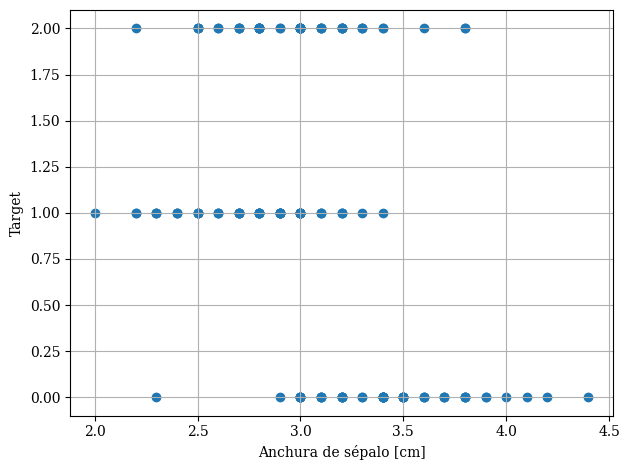

In [138]:
plt.scatter(X[:,1], y)
plt.xlabel('Anchura de sépalo [cm]')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

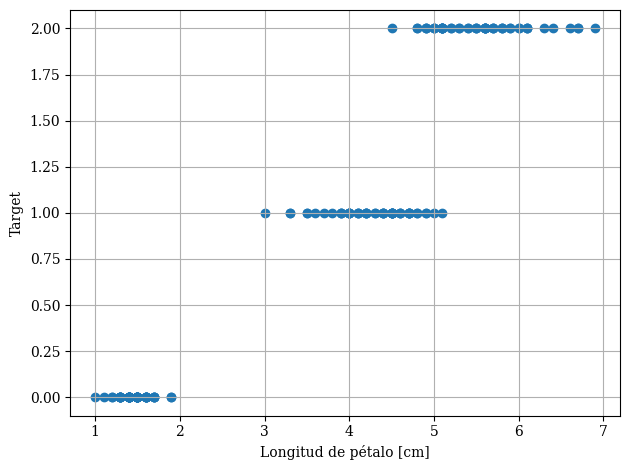

In [139]:
plt.scatter(X[:,2], y)
plt.xlabel('Longitud de pétalo [cm]')
plt.ylabel('Target')

Text(0, 0.5, 'Target')

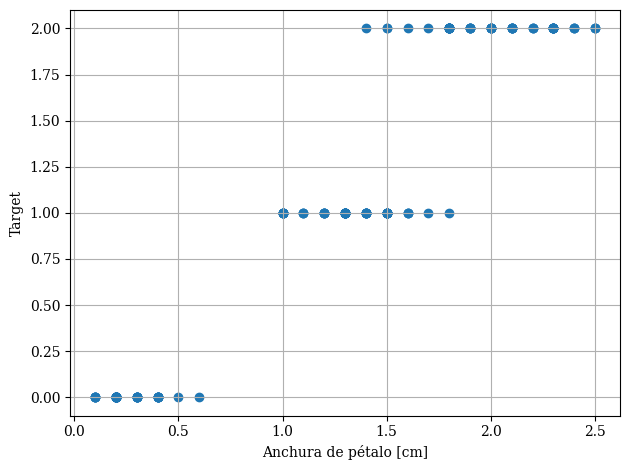

In [140]:
plt.scatter(X[:,3], y)
plt.xlabel('Anchura de pétalo [cm]')
plt.ylabel('Target')

## Árbol de decisión

[Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [141]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

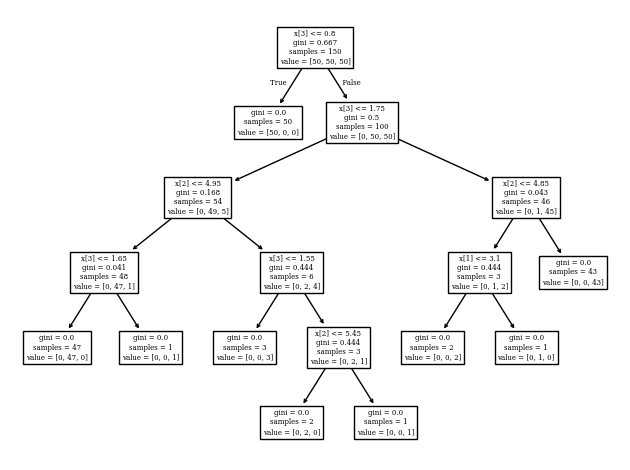

In [142]:
tree.plot_tree(clf);

In [143]:
y_pred = clf.predict(X)

## Entrenamiento/test

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

X_train.shape

(100, 4)

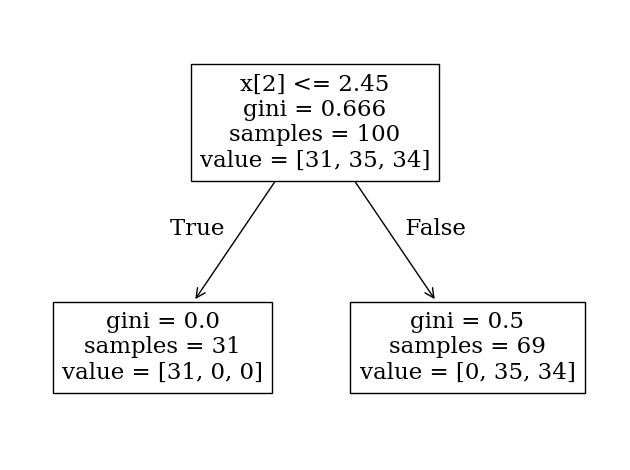

In [145]:
clf = tree.DecisionTreeClassifier(max_depth=1)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf);

In [146]:
y_pred = clf.predict(X_test)

## Medida de la precisión de clasificación

- [Matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py), función [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [147]:
y_test-y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

In [148]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0, 16,  0]])

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0 16  0]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


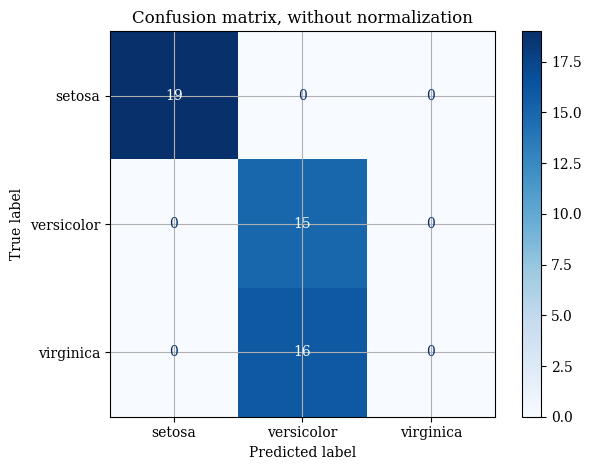

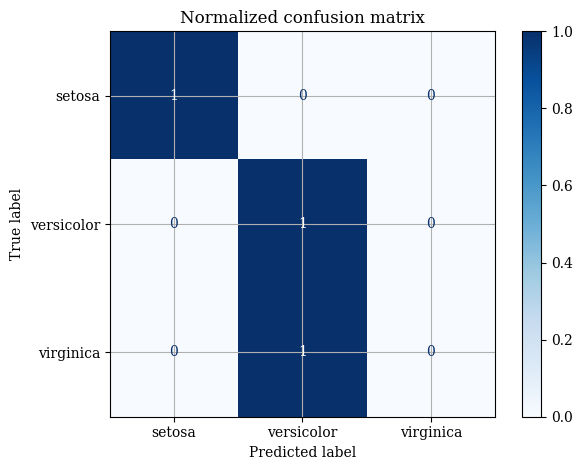

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=iris.target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()